In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import yfinance as yf

In [3]:
data1 = yf.download("SPY GOOG IBM GLD", start="2019-01-01", end="2019-12-31",
                   group_by="ticker")

[*********************100%***********************]  4 of 4 completed


In [4]:
df1=data1['GOOG']['Close']
df2=data1['SPY']['Close']
df3=data1['IBM']['Close']
df4=data1['GLD']['Close']

In [5]:
df=pd.DataFrame.from_dict({'GOOG' :df1,'SPY': df2,'IBM': df3,'GLD':df4})

In [6]:
df.head()

,GLD,GOOG,IBM,SPY
Date,,,,
2018-12-31,121.250000,1035.609985,113.669998,249.919998
2019-01-02,121.330002,1045.849976,115.209999,250.179993
2019-01-03,122.430000,1016.059998,112.910004,244.210007
2019-01-04,121.440002,1070.709961,117.320000,252.389999
2019-01-07,121.860001,1068.390015,118.150002,254.380005


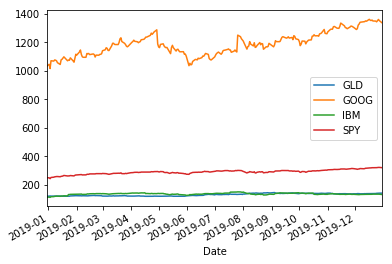

In [7]:
df.plot()

# mean

In [8]:
df.mean()

GLD      131.431032
GOOG    1187.196986
IBM      136.909525
SPY      290.710118
dtype: float64

# median

In [9]:
df.median()

GLD      132.769997
GOOG    1184.539978
IBM      137.029999
SPY      291.384995
dtype: float64

# std

In [10]:
df.std()

GLD      8.616101
GOOG    81.787116
IBM      6.338265
SPY     15.200066
dtype: float64

# Rolling mean

In [11]:
rm_spy=df['SPY'].rolling(window=20).mean()

# BOWlinger Bands

In [13]:
rstd_spy=df['SPY'].rolling(window=20).std()

In [14]:
upper_band=rm_spy+2*rstd_spy

In [15]:
lower_band=rm_spy-2*rstd_spy

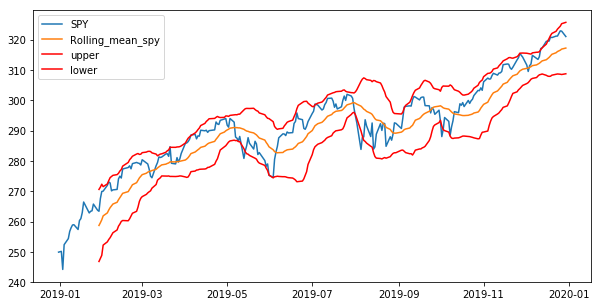

In [16]:
plt.figure(figsize=(10,5))
plt.plot(df['SPY'],label='SPY')
plt.plot(rm_spy,label='Rolling_mean_spy')
plt.plot(upper_band,'r',label='upper')
plt.plot(lower_band,'r',label='lower')
plt.legend()
#rm_spy

# Daily returns

$$r=\frac{p(t)}{p(t-1)}-1$$

In [17]:
df.head()

,GLD,GOOG,IBM,SPY
Date,,,,
2018-12-31,121.250000,1035.609985,113.669998,249.919998
2019-01-02,121.330002,1045.849976,115.209999,250.179993
2019-01-03,122.430000,1016.059998,112.910004,244.210007
2019-01-04,121.440002,1070.709961,117.320000,252.389999
2019-01-07,121.860001,1068.390015,118.150002,254.380005


In [18]:
df['GLD_return']=df['GLD']/df['GLD'].shift(1)-1
df['GOOG_return']=df['GOOG']/df['GOOG'].shift(1)-1
df['IBM_return']=df['IBM']/df['IBM'].shift(1)-1
df['SPY_return']=df['SPY']/df['SPY'].shift(1)-1

In [19]:
df.head()

,GLD,GOOG,IBM,SPY,GLD_return,GOOG_return,IBM_return,SPY_return
Date,,,,,,,,
2018-12-31,121.250000,1035.609985,113.669998,249.919998,NaN,NaN,NaN,NaN
2019-01-02,121.330002,1045.849976,115.209999,250.179993,0.000660,0.009888,0.013548,0.001040
2019-01-03,122.430000,1016.059998,112.910004,244.210007,0.009066,-0.028484,-0.019964,-0.023863
2019-01-04,121.440002,1070.709961,117.320000,252.389999,-0.008086,0.053786,0.039058,0.033496
2019-01-07,121.860001,1068.390015,118.150002,254.380005,0.003458,-0.002167,0.007075,0.007885


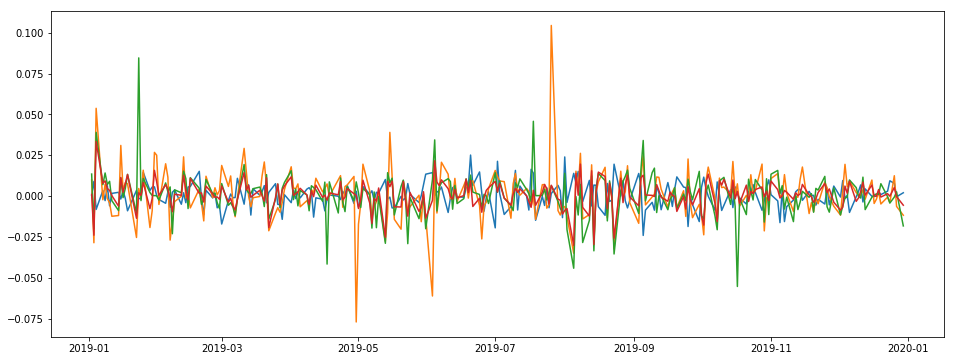

In [20]:
plt.figure(figsize=(16,6))
plt.plot(df['GLD_return'],label='GLD')
plt.plot(df['GOOG_return'],label='GOOG')
plt.plot(df['IBM_return'],label='IBM')
plt.plot(df['SPY_return'],label='SPY')
#df[['GLD_return','GOOG_return','IBM_return','SPY_return']].plot()
plt.show()

In [21]:
returns_gld=(df['GLD_return']+1).cumprod()-1
returns_goog=(df['GOOG_return']+1).cumprod()-1
returns_ibm=(df['IBM_return']+1).cumprod()-1
returns_spy=(df['SPY_return']+1).cumprod()-1
#returns

Text(0.5,1,'SPY')

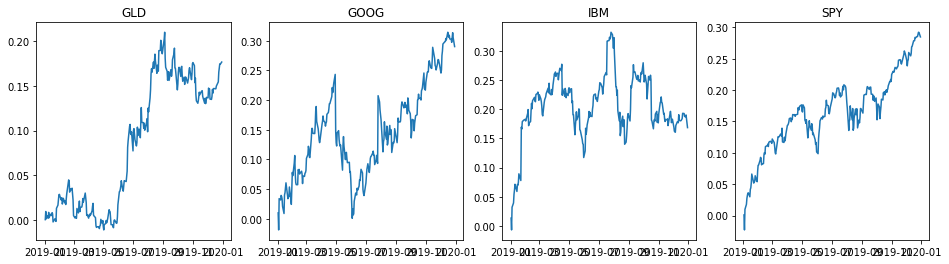

In [26]:
plt.figure(figsize=(16,4))
plt.subplot(141)
plt.plot(returns_gld)
plt.title('GLD')
plt.subplot(142)
plt.plot(returns_goog)
plt.title('GOOG')
plt.subplot(143)
plt.plot(returns_ibm)
plt.title('IBM')
plt.subplot(144)
plt.plot(returns_spy)
plt.title('SPY')


# Filling NA values

```
forward fill
df.fillna(method='ffill',inplace=True)
backward fill
df.fillna(method='bfill',inplace=True)

```